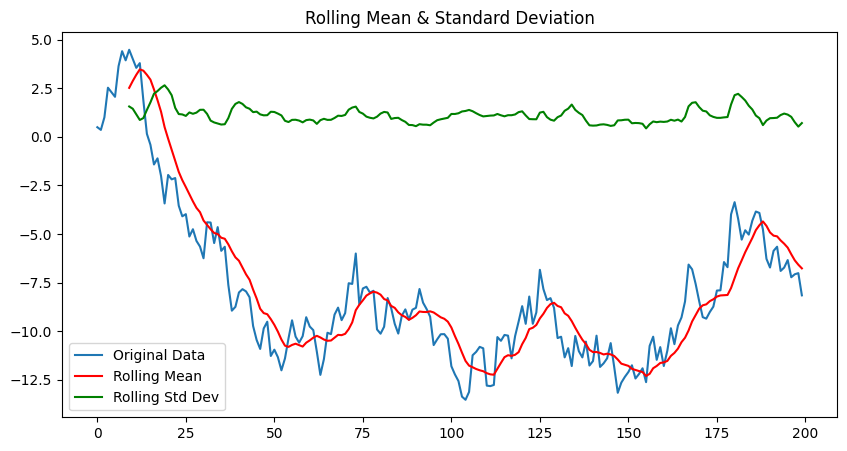

Augmented Dickey-Fuller (ADF) Test:
ADF Statistic: -2.3073
p-value: 0.1696
Critical Values: {'1%': -3.4636447617687436, '5%': -2.8761761179270766, '10%': -2.57457158581854}
Conclusion: The time series is Non-Stationary.

Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:
KPSS Statistic: 0.7001
p-value: 0.0135
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: The time series is Non-Stationary.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

def generate_time_series(n=100, seed=42):
    np.random.seed(seed)
    return np.cumsum(np.random.randn(n))

def adf_test(series):
    result = adfuller(series)
    print("Augmented Dickey-Fuller (ADF) Test:")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", result[4])
    if result[1] < 0.05:
        print("Conclusion: The time series is Stationary.\n")
    else:
        print("Conclusion: The time series is Non-Stationary.\n")

def kpss_test(series):
    result = kpss(series, regression='c', nlags='auto')
    print("Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:")
    print(f"KPSS Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Critical Values:", result[3])
    if result[1] < 0.05:
        print("Conclusion: The time series is Non-Stationary.\n")
    else:
        print("Conclusion: The time series is Stationary.\n")

def plot_rolling_statistics(series, window=10):
    rolling_mean = series.rolling(window=window).mean()
    rolling_std = series.rolling(window=window).std()

    plt.figure(figsize=(10,5))
    plt.plot(series, label="Original Data")
    plt.plot(rolling_mean, label="Rolling Mean", color='red')
    plt.plot(rolling_std, label="Rolling Std Dev", color='green')
    plt.legend()
    plt.title("Rolling Mean & Standard Deviation")
    plt.show()

if __name__ == "__main__":
    data = generate_time_series(200)
    df = pd.Series(data)

    plot_rolling_statistics(df)
    adf_test(df)
    kpss_test(df)